In [ ]:
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
#%pip install geopandas

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

The relevant data set is collected in the subfolder "data". Note, that the data itself is not part of the repository and should be downloaded from  https://survey.stackoverflow.co/

In [4]:
df = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_public.csv')
print('total number of participants:', len(df))
#df.head()

total number of participants: 65437


Question 1: What are the top x countries with most participants in the survey? If we take a look at the distribution of some 
variables (e.g. usage of AI Tools) is there a dependency on the country?

First, identify the countries with the highest number of participants and choose the top n countries

In [33]:
num_countries = 14

considered_countries = set(df['Country'].value_counts().head(num_countries).index.tolist())
print('countries under investigation: ', considered_countries)

df_restricted_countries = df.loc[df['Country'].isin(considered_countries)]
n_participants_top_countries = len(df_restricted_countries)
p_participants_top_countries = n_participants_top_countries / len(df) * 100
print('reduced data set: ', len(df_restricted_countries), 'accounts for ', p_participants_top_countries, '% of all accounts')

participants_per_country = df_restricted_countries['Country'].value_counts()
print(participants_per_country)

countries under investigation:  {'Brazil', 'Australia', 'Spain', 'United Kingdom of Great Britain and Northern Ireland', 'India', 'Netherlands', 'Sweden', 'United States of America', 'Poland', 'Canada', 'Ukraine', 'Italy', 'Germany', 'France'}
reduced data set:  39481 accounts for  60.33436740681877 % of all accounts
Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                

Show the selected countries on a world map

In [36]:
# load world map data
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
world = gpd.read_file(url)

# rename column country names in world map data
def rename_world_data(world):
    ''' rename countries in world data set'''
    renaming_dic = {
        'Bosnia and Herzegovina': 'Bosnia and Herz.',
        'Central African Republic': 'Central African Rep.',
        'Congo (Brazzaville)': 'Congo',
        'Congo (Kinshasa)': 'Dem. Rep. Congo',
        'Côte d\'Ivoire': 'Côte d’Ivoire',
        'Dominican Republic': 'Dominican Rep.',
        'Gambia': 'Gambia, The',
        'Guinea-Bissau': 'Guinea-Biss',
        'Ivory Coast': 'Côte d’Ivoire',
        'Laos': 'Lao PDR',
        'Macedonia': 'Macedonia, FYR',
        'Moldova': 'Moldova, Republic of',
        'Myanmar': 'Myanmar/Burma',
        'Palestinian Territories': 'West Bank and Gaza',
        'Russian Federation': 'Russia',
        'Serbia': 'Serbia and Montenegro',
        'South Korea': 'Korea, Republic of',
        'Sudan (Nijmegen)': 'Sudan',
        'Syria': 'Syrian Arab Republic',
        'Tanzania': 'Tanzania, United Republic of',
        'The Gambia': 'Gambia, The',
        'Timor-Leste': 'Timor-Leste (Papua New Guinea)',
        'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
        'United States': 'United States of America',
        'Venezuela': 'Venezuela, Bolivarian Republic of',
        'Vietnam': 'Viet Nam'
    }
    world['name'] = world['name'].replace(renaming_dic)    
    return world

world = rename_world_data(world)

# check wether the top n countries of the survey exists in world data set
missing_countries_in_world_data = set(considered_countries) - set(world['name'])
assert not missing_countries_in_world_data, f"There are countries missing in the world data set: {missing_countries_in_world_data}"


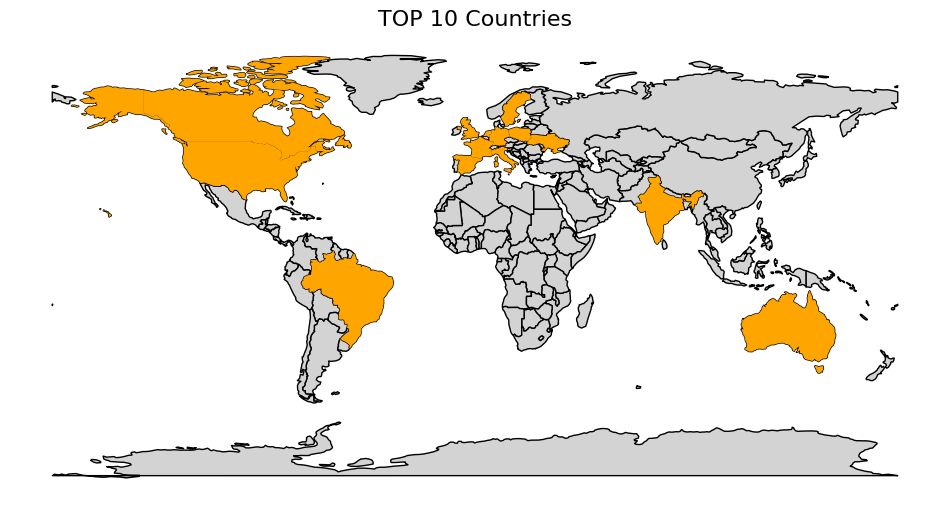

In [35]:
# plot the world map with highlighted top x countries from survey
# TODO: indicate the percentage of participants

world['meets_criteria'] = False
world.loc[world['name'].isin(considered_countries),'meets_criteria'] = True    

fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray', edgecolor='black')  
world[world['meets_criteria']].plot(ax=ax, color='orange')  

ax.set_title('TOP 10 Countries', fontsize=16)
ax.axis('off')

plt.show()    


Consider the parameter 'AISelect', which refers to the question: "Do you currently use AI tools in your development process?

In [61]:
# full dataset
df['AISelect'].value_counts(dropna=False,normalize=True)

AISelect
Yes                        0.575546
No, and I don't plan to    0.226737
No, but I plan to soon     0.128490
NaN                        0.069227
Name: proportion, dtype: float64

In [60]:

subset_AISelect = df[['Country','AISelect']].dropna(how='any')

subset_AISelect_topx = subset_AISelect.loc[subset_AISelect['Country'].isin(considered_countries)].copy()
subset_AISelect_topx['AISelect'].value_counts(normalize=True)

subset_AISelect_topx['AI_Usage_True'] = subset_AISelect_topx['AISelect'] == 'Yes'
result = subset_AISelect_topx.groupby('Country')['AI_Usage_True'].mean().sort_values(ascending=False)
print(result)


Country
Ukraine                                                 0.723388
India                                                   0.679404
Brazil                                                  0.659839
Spain                                                   0.652915
Poland                                                  0.629678
Sweden                                                  0.620040
Netherlands                                             0.602359
Canada                                                  0.582054
Italy                                                   0.571321
Germany                                                 0.570963
Australia                                               0.548284
United States of America                                0.542496
France                                                  0.542025
United Kingdom of Great Britain and Northern Ireland    0.507012
Name: AI_Usage_True, dtype: float64


In [63]:
numeric_columns= df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)

['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat']
